In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.feature_selection import VarianceThreshold, SelectFromModel, RFECV, SequentialFeatureSelector

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_classification, load_wine, load_breast_cancer, load_diabetes, load_digits

In [3]:
plt.style.use('seaborn-darkgrid')

In [4]:
def plot_scatter(x, y, auto_scaled=True, title=None, clusters=None):
    plt.figure(figsize=(4, 4))
    plt.scatter(x, y, c=clusters, cmap='bwr')
    
    if not auto_scaled:
        plt.axis('square')
    
    plt.grid(True)
    plt.title(title)
    
    plt.show()
    
def return_X_y(data, target_column):
    return data.drop(target_column, axis=1), data[target_column]

In [5]:
wine_sklearn = load_wine(as_frame=True)
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

In [6]:
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# Homework

## Exercise  1 - Scaling (2 points)

Perform standardization for wine dataset (`wine_data`) using only basic python, numpy and pandas (without using `StandardScaler` and sklearn at all). Implementation of function (or class) that can get dataset as input and return standardized dataset as output is preferrable, but not necessary.

Compare you results (output) with `StandardScaler`.

**NOTE:**

- 1 point for functional version, 2 points for implementing scaling as sklearn pipeline compartible class. 
- Maximum for the exercise is 2 points.


### Simple version (1 point)

In [7]:
# 1 point
def scale(X):
    # your code here
    X_scaled = (X - np.mean(X, axis=0))/np.std(X, axis=0)
    return X_scaled

In [8]:
assert np.allclose(np.array(scale(wine_data)), StandardScaler().fit_transform(wine_data))
print('sucsess')

sucsess


### Pipeline Version (2 points)

In [97]:
# 2 points
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, copy=True, with_mean=True, with_std=True):
        self.with_mean = with_mean
        self.with_std = with_std
        self.copy = copy
        # your code here

    def fit(self, X, y=None):
        if hasattr(self, "scale_"):
            del self.scale_
            del self.mean_
            
        if self.with_mean:
            self.mean_ = np.mean(X, axis=0)
        if self.with_std:
            self.scale_ = np.std(X, axis=0)
            
        return self

    def transform(self, X, y=None, copy=None):
        # your code here
        check_is_fitted(self)
        copy = copy if copy is not None else self.copy
        if self.with_mean:
            X -= self.mean_
        if self.with_std:
            X /= self.scale_
        return X

In [98]:
assert np.allclose(CustomScaler().fit_transform(wine_data), StandardScaler().fit_transform(wine_data))
print('sucsess')

sucsess


## Exercise  2 - Visualization (3 points)

As noted earlier, standardization/normalization of data can be crucial for some distance-based ML methods.

Let’s generate some toy example of unnormalized data and visualize the importance of this process once more:

In [11]:
feature_0 = np.random.randn(1000) * 10   
feature_1 = np.concatenate([np.random.randn(500), np.random.randn(500) + 5])
data = np.column_stack([feature_0, feature_1])
data 

array([[ -1.89978151,   0.64409081],
       [-26.11887355,   0.06178969],
       [ 12.63982583,  -2.1725372 ],
       ...,
       [  2.62760616,   4.5215966 ],
       [ -7.69884045,   4.23665446],
       [-12.28451903,   3.7789209 ]])

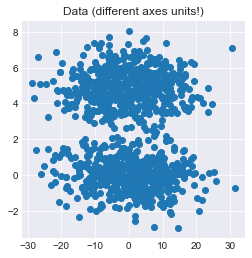

In [12]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=True, title='Data (different axes units!)')

**NOTE:** on the plot above axes are scaled differently and we can clearly see two potential *classes/clusters*. In fact `matplotlib` performed `autoscaling` (which is basically can be considered as `MinMaxScaling` of original data) just for better visualization purposes.

Let's turn this feature off and visualize the original data on the plot with equally scaled axes:

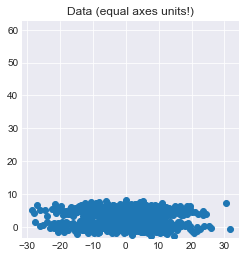

In [13]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=False , title='Data (equal axes units!)')

This picture is clearly less interpretable, but much closer to "how distance-based algorithm see the original data": separability of data is hardly noticable only because the variation (std) of x-feature is much bigger in absolute numbers.

Perform `StandardScaling` and `MinMaxScaling` of original data; visualize results for each case (**use `plot_scatter` with `auto_scaled=False`**):

### MinMaxScaling (0.5 point)

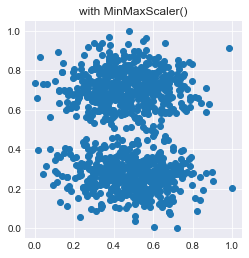

In [14]:
## your code
plot_scatter(MinMaxScaler().fit_transform(data)[:, 0], MinMaxScaler().fit_transform(data)[:, 1], auto_scaled=False , title='with MinMaxScaler()')

### StandardScaler (0.5 point)

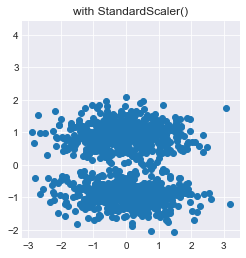

In [15]:
## your code
plot_scatter(StandardScaler().fit_transform(data)[:, 0], StandardScaler().fit_transform(data)[:, 1], auto_scaled=False , title='with StandardScaler()')

### (Bonus) K-means (2 points)

Illustrate the impact of scaling on basic distance-based clustering algorithm [K-means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) using `data` generated above.

**NOTE:** basically, you don't need understanding K-means algorithm here, you just need to:

1) run algorithm (with k=2, k - number of clusters/classes) on unscaled data    
2) run algorithm (with k=2) on scaled data    
3) plot results: highlight different clusters using different colors.

You can use this [question](https://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clustering/89813) as a hint, but I recommend you to plot results using `plot_scatter` with `equal_scaled=True`: it might help you to intuitively understand the reasons of such scaling impact.


In [16]:
## your code
km = KMeans(n_clusters = 2)
km.fit(data)

KMeans(n_clusters=2)

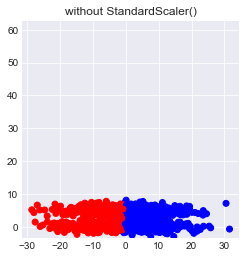

In [17]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=False , clusters = km.labels_, title='without StandardScaler()')

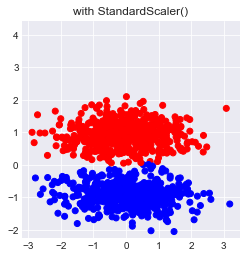

In [18]:
km = KMeans(n_clusters = 2)
data_sc = StandardScaler().fit_transform(data) 
km.fit(data_sc)
plot_scatter(data_sc[:, 0],data_sc[:, 1], auto_scaled=False , clusters = km.labels_, title='with StandardScaler()')

## Exercise  3 - Preprocessing Pipeline (2 points)

In [19]:
wine_sklearn = load_wine(as_frame=True)
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

In [20]:
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [21]:
wine_train, wine_val, wine_labels_train, wine_labels_val = train_test_split(wine_data, wine_labels, 
                                                                            test_size=0.3, random_state=42)

Train model (for example, `LogisticRegression(solver='liblinear', penalty='l1')` on raw `wine_train` data; then train same model after data scaling; then add feature selection (and train model again on scaled data). For each experiment all required preprocessing steps (if any) should be wrapped into sklearn pipeline.

Measure `accuracy` of all 3 approaches on `wine_val` dataset. Describe and explain results.

In [22]:
## raw data
log_reg = LogisticRegression(solver='liblinear', penalty='l1')
pipe = Pipeline([("modelling", log_reg)])
pipe.fit(wine_train, wine_labels_train)
print(accuracy_score(wine_labels_train,pipe.predict(wine_train)),accuracy_score(wine_labels_val,pipe.predict(wine_val)))

0.967741935483871 0.9814814814814815


In [23]:
## scaled data
log_reg1 = LogisticRegression(solver='liblinear', penalty='l1')
scaler1 = StandardScaler()
pipe1 = Pipeline([
                ("scaling", scaler1),
                ("modelling", log_reg1)
                ])
pipe1.fit(wine_train, wine_labels_train)
print(accuracy_score(wine_labels_train,pipe1.predict(wine_train)),accuracy_score(wine_labels_val,pipe1.predict(wine_val)))

1.0 0.9814814814814815


In [24]:
## scaled & selected data
log_reg2 = LogisticRegression(solver='liblinear', penalty='l1')
scaler2 = StandardScaler()
selector2 = VarianceThreshold(0.7)
pipe2 = Pipeline([
                ("selecting", selector2),
                ("scaling", scaler1),
                ("modelling", log_reg1)
                ])
pipe2.fit(wine_train, wine_labels_train)
print(accuracy_score(wine_labels_train,pipe2.predict(wine_train)),accuracy_score(wine_labels_val,pipe2.predict(wine_val)))

0.967741935483871 1.0


## Exercise 4 - manual PCA (5 points)
The task is to solve PCA as an optimization problem, without explicitly doing eigen value decomposition.
In the most general setting PCA is minimization of reconstruction error of a projection of given rank $q$

$$\min_{\mu, \lambda_1,\ldots, \lambda_n, \mathbf{V}_q} \sum_{i=1}^n ||x_i - \mu - \mathbf{V}_q \lambda_i||^2$$

With a number of steps that can be found here https://stats.stackexchange.com/a/10260 this task transforms to
 $$\max_{u_i} \sum_{i=1}^q u_i^T \mathbf{S} u_i$$
 where $\mathbf{S}$ is the sample covariance matrix (after standartization) and $u_1, \ldots, u_q$ are the $q$ are orthonormal columns in $\mathbf{V}_q$.
 Let us solve this optimization problem with `scipy.optimize` library.
 
 Additional 2 point are given for visualization of the results.

### PCA (3 points)

In [84]:
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

Find a covariance matrix of standartized data and assing it to S.

In [85]:
## your code
#D =  StandardScaler().fit_transform(wine_data)
#S = np.cov(np.array(StandardScaler().fit_transform(wine_data)),rowvar = False)
#np.linalg.norm(S)

In [86]:
wine_data_scaled = StandardScaler().fit_transform(wine_data)
x = wine_data_scaled.mean(axis = 0)
S = ((wine_data_scaled - x).transpose() @ (wine_data_scaled-x))/(wine_data_scaled.shape[0]-1)
np.linalg.norm(S)

5.787241159764733

If your code is correct, the following assert should be Ok.

In [88]:
assert np.allclose(np.linalg.norm(S), 5.787241159764733)

In [89]:
from scipy.optimize import minimize

def objective(x):
    # your code: write objective of the problem (don't forget that scipy does min while we need max)
    return -(x.transpose()@S@x)

def norm_constraint(x):
    # your code: constaraint norm of x to be 1, function should return 0 if constraint holds
    return np.linalg.norm(x) - 1.0

con1 = {'type': 'eq', 'fun': norm_constraint}

x0 = np.zeros(S.shape[0])
# your code: initial vector to start optimization

sol = minimize(objective, 
               x0,
               tol=0.1e-15,
               constraints = [con1]
              )
x0 = sol.x


In [90]:
print(x0@S@x0)

4.732436977583588


Hurray! We have first vector! Let's do another one.

In [91]:
def orthogonality_constraint(x):
    # your code: x should be orthogonal to x0, function should return 0 if constraint holds
    return x@x0

con2 = {'type': 'eq', 'fun': orthogonality_constraint}

x1 = np.zeros(S.shape[0])# your code: initial vector to start optimization

sol = minimize(objective, 
               x1,
               tol=0.1e-15,
               constraints = [con1,con2]
              )

x1 = sol.x

In [92]:
print(x1@S@x1)

2.511080929645353


If your solution is correct, the following asserts should be Ok.

In [93]:
assert np.allclose(x0@S@x0, 4.732436977583595)
assert np.allclose(x1@S@x1, 2.5110809296451233)
print('success')

success


### Visualization (2 points)

Visualize the points after applying custom dimension reduction with 2 components.

In [94]:
X = np.column_stack((x0, x1))
wine_scaled = StandardScaler().fit_transform(wine_data)
#получим новый датасет уменьшением размерности
wine_reduce = np.array(wine_scaled@X)


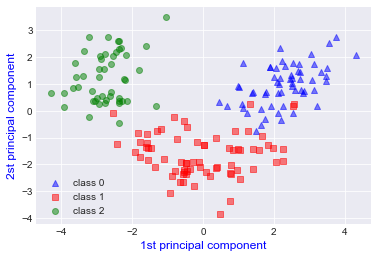

In [95]:
plt.figsize=(10, 8)
for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    plt.scatter(wine_reduce[wine_labels == l, 0], wine_reduce[wine_labels == l, 1], 
                color=c, label=f'class {l}', alpha=0.5, marker=m)
plt.xlabel('1st principal component',fontsize=12, color='blue')
plt.ylabel('2st principal component',fontsize=12, color='blue')
plt.legend()
plt.show()

## Exercise 5 - Boruta (3 points)

Let us classify handwritten digits 0, 1 and 2. 
To make task not so easy the images are binarized (no shadows of gray present) as it happens with xerocopied documents.

Let us also find out to which parts of an image there's no need to look in order to clasify three digits of interest.

In [93]:
X, y = load_digits(n_class=3, return_X_y=True, as_frame=True)
X = (X>10).astype(int)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   pixel_0_0  537 non-null    int32
 1   pixel_0_1  537 non-null    int32
 2   pixel_0_2  537 non-null    int32
 3   pixel_0_3  537 non-null    int32
 4   pixel_0_4  537 non-null    int32
 5   pixel_0_5  537 non-null    int32
 6   pixel_0_6  537 non-null    int32
 7   pixel_0_7  537 non-null    int32
 8   pixel_1_0  537 non-null    int32
 9   pixel_1_1  537 non-null    int32
 10  pixel_1_2  537 non-null    int32
 11  pixel_1_3  537 non-null    int32
 12  pixel_1_4  537 non-null    int32
 13  pixel_1_5  537 non-null    int32
 14  pixel_1_6  537 non-null    int32
 15  pixel_1_7  537 non-null    int32
 16  pixel_2_0  537 non-null    int32
 17  pixel_2_1  537 non-null    int32
 18  pixel_2_2  537 non-null    int32
 19  pixel_2_3  537 non-null    int32
 20  pixel_2_4  537 non-null    int32
 21  pixel_2_5  537 n

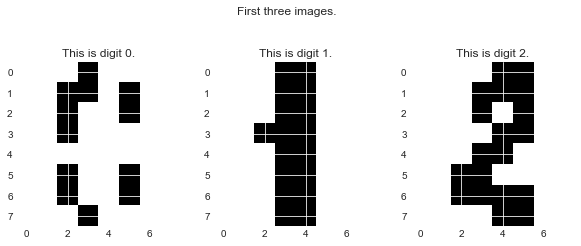

In [94]:
f, ax = plt.subplots(1,3,figsize=(10,4))
for i in range(3):
    ax[i].imshow(X.iloc[i].values.reshape(8,8))
    ax[i].set_title(f"This is digit {y[i]}.")
plt.suptitle("First three images.")
plt.show()

Split data into train and test, let test size be 30% of the dataset and fix random state to 42:

In [95]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)## your code here


In [96]:
assert y_val.shape[0] == 162
assert y_val.sum() == 169

Fit a RandomForestClassifier with max_depth=13 and evaluate it's performance:

In [97]:
clf = RandomForestClassifier(max_depth=13)
clf.fit(X_train, y_train)

acc = clf.score(X_val, y_val)# your code here
print(acc)

0.9876543209876543


In [98]:
assert acc > 0.98

Now we will use Boruta to find redundand pixels. If the package is not installed in your system, uncomment and run the following cell.

In [99]:
#! pip install boruta

In [100]:
from boruta import BorutaPy

feat_selector = BorutaPy(RandomForestClassifier(max_depth=13), 
                         n_estimators='auto', 
                         verbose=0, 
                         max_iter=100,
                         random_state=42)

feat_selector.fit(np.array(X_train), np.array(y_train)) #your code here: do run the boruta

BorutaPy(estimator=RandomForestClassifier(max_depth=13, n_estimators=62,
                                          random_state=RandomState(MT19937) at 0x24F718AD240),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x24F718AD240)

Let us print redundant pixels as a mask. Does the result looks similar to mine (or to Among us chracters)? 

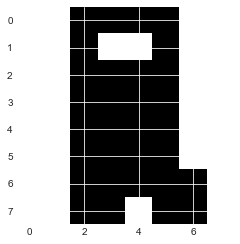

In [101]:
mask = np.array(feat_selector.support_).reshape(8,8)
plt.imshow(mask);

At the end let us redo  classification but only with selected features

In [103]:
clf = RandomForestClassifier(max_depth=13, random_state = 42)
features = X_train.columns[feat_selector.support_].to_list()

# your code here
clf.fit(X_train[features], y_train)

acc = clf.score(X_val[features], y_val)
print(acc)
#X_val[features].info()

0.9938271604938271


In [104]:
assert acc > 0.99
print('success')

success


# Materials & References

1. General article about feature engineering and selection (main reference):
https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_english/topic06_features_regression/topic6_feature_engineering_feature_selection.ipynb

2. Feature engineering/preprocessing, using scikit-learn API (great code examples, but really brief explanation):    
https://scikit-learn.org/stable/modules/preprocessing

3. Feature scaling/normalization:     
https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

4. Log Transform/power transform:    
https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9

6. Missing values preprocessing using scikit-learn API (great code examples, great explanation):    
https://scikit-learn.org/stable/modules/impute.html

7. Feature selection scikit-learn API (great code examples, great explanation):   
https://scikit-learn.org/stable/modules/feature_selection.html

8. Melbourne housing dataset source:    
https://www.kaggle.com/anthonypino/melbourne-housing-market